## Data Cleaning

In [17]:
raw_data_extracted = 'raw_data_unzipped'

In [2]:
import shutil

def delete_dir(dir_to_delete):
    try:
        file_count = sum([len(files) for r, d, files in os.walk(dir_to_delete)])
        shutil.rmtree(dir_to_delete)
        print(f"Directory {dir_to_delete} and all its contents ({file_count} files) have been successfully deleted.")
    except Exception as e:
        print(f"An error occurred while trying to delete the directory: {e}")


# This is in case of testing and if the initial raw files need to be deleted. 
#delete_dir(raw_data_extracted)

In [3]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    return extract_to



raw_data_zip = 'raw_data/midi_classic_music_data.zip'
raw_data_extracted = unzip_file(raw_data_zip, raw_data_extracted)

display(f"Extracted to: {raw_data_extracted}")

'Extracted to: raw_data_unzipped'

In [4]:
import os
import shutil

def move_contents_up_one_dir(path):
    path = os.path.abspath(path)
    parent_dir = os.path.dirname(path)
    if path == parent_dir or not os.path.exists(path):
        print("Operation not allowed or path does not exist.")
        return
    for item in os.listdir(path):
        shutil.move(os.path.join(path, item), os.path.join(parent_dir, item))
    os.rmdir(path)
    print(f"All contents moved from {path} to {parent_dir} and directory removed.")

move_contents_up_one_dir(os.path.join(raw_data_extracted, 'midiclassics'))


Error: Destination path '/Users/zaina/Desktop/Masters-class/AAI-511-Final-Project/raw_data_unzipped/Arndt/Arndt' already exists

In [ ]:
def rename_mid_files(directory):
    rename_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.MID'):
                old_file_path = os.path.join(root, file)
                new_file_path = os.path.join(root, file[:-4] + '.mid')
                os.rename(old_file_path, new_file_path)
                rename_count += 1
                # print(f'Renamed: {old_file_path} to {new_file_path}')
    return rename_count

def delete_zip_files(directory):
    delete_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.zip'):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                delete_count += 1
                # print(f'Deleted: {file_path}')
    return delete_count

# some files seem to have .MID
renamed_files_count = rename_mid_files(raw_data_extracted)
print(f'Total .MID files renamed: {renamed_files_count}')
# Also, there are zip files are duplications of the files
deleted_files_count = delete_zip_files(raw_data_extracted) 
print(f'Total .zip files deleted: {deleted_files_count}')


Total .MID files renamed: 732
Total .zip files deleted: 31


In [ ]:
import os

def categorize_files_by_dir(path):
    files_and_dirs = os.listdir(path)
    directories = {name for name in files_and_dirs if os.path.isdir(os.path.join(path, name))}
    file_dict = {}
    unassigned_files = {}

    for file_name in files_and_dirs:
        file_path = os.path.join(path, file_name)
        if os.path.isfile(file_path) and file_name.endswith('.mid'):
            first_word = file_name.split()[0]
            if first_word in directories:
                if first_word not in file_dict:
                    file_dict[first_word] = []
                file_dict[first_word].append(file_name)
            else:
                if first_word not in unassigned_files:
                    unassigned_files[first_word] = []
                unassigned_files[first_word].append(file_name)

    return file_dict, unassigned_files, sorted(directories)

def display_info(categorized_files, unassigned_files):
    print("Categorized Files Summary:")
    for key, files in categorized_files.items():
        print(f"Artist '{key}': {len(files)} files")
    
    print("\nUnassigned Files Summary:")
    if unassigned_files:
        for key, files in unassigned_files.items():
            print(f"Artist '{key}': {len(files)} files")
    else:
        print("No unassigned files found.")

categorized_files, unassigned_files, all_artists = categorize_files_by_dir(raw_data_extracted)

print("Categorized Files Summary:")
for key, files in categorized_files.items():
    print(f"Artist {key}: {len(files)} files")

print("\nUnassigned Files Summary:")
for key, files in unassigned_files.items():
    print(f"Artist {key}: {len(files)} files")


Categorized Files Summary:
Artist Liszt: 7 files
Artist Tchaikovsky: 13 files
Artist Ginastera: 1 files
Artist Kuhlau: 5 files
Artist Debussy: 4 files
Artist Dvorak: 6 files
Artist Grieg: 2 files
Artist Bartok: 2 files
Artist Sibelius: 1 files
Artist Wagner: 1 files

Unassigned Files Summary:
Artist Rothchild: 11 files
Artist Diabelli: 11 files
Artist Bizet: 5 files
Artist Tchaicovsky: 1 files
Artist Reinecke: 3 files
Artist Buxethude: 13 files
Artist Gershuin: 1 files
Artist Nicolai: 1 files
Artist Rimsky: 1 files
Artist Rothchlid: 1 files
Artist meditation: 1 files
Artist Pollen: 1 files
Artist Pachebel: 5 files
Artist C.P.E.Bach: 1 files
Artist Reger: 3 files
Artist Lizt: 1 files


In [ ]:
corrections_to_file_placement = {
    'Pachebel': 'Pachelbel',
    'Lizt': 'Liszt'
}

for old_key, new_key in corrections_to_file_placement.items():
    if old_key in unassigned_files:
        unassigned_files[new_key] = unassigned_files.pop(old_key)

In [ ]:
def move_folder_contents(src_folder, dest_folder):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    
    for item in os.listdir(src_folder):
        src_item = os.path.join(src_folder, item)
        dest_item = os.path.join(dest_folder, item)
        
        if os.path.isdir(src_item):
            shutil.move(src_item, dest_folder)
        else:
            shutil.move(src_item, dest_item)
    
    # Delete the source folder regardless of its contents
    delete_dir(src_folder)

name_corrections_folder = {
    "Albe'niz": "Albeniz",
    "Albe╠üniz": "Albeniz",
    "Mendelsonn": "Mendelssohn",
    "Tchakoff": "Tchaikovsky",
    "Handel": "Handel",
    "Haendel": "Handel",
    "Straus": "Strauss",
    "Strauss, J": "Strauss"
}

In [ ]:
for src_folder, dest_folder in name_corrections_folder.items():
    src_path = os.path.join(raw_data_extracted, src_folder)
    dest_path = os.path.join(raw_data_extracted, dest_folder)
    print(f"Moving contents from {src_path} to {dest_path}...")
    move_folder_contents(src_path, dest_path)

print("Folder contents moved and directories deleted successfully.")

Moving contents from raw_data_unzipped/Albe'niz to raw_data_unzipped/Albeniz...
Directory raw_data_unzipped/Albe'niz and all its contents (0 files) have been successfully deleted.
Moving contents from raw_data_unzipped/Albe╠üniz to raw_data_unzipped/Albeniz...
Directory raw_data_unzipped/Albe╠üniz and all its contents (0 files) have been successfully deleted.
Moving contents from raw_data_unzipped/Mendelsonn to raw_data_unzipped/Mendelssohn...
Directory raw_data_unzipped/Mendelsonn and all its contents (0 files) have been successfully deleted.
Moving contents from raw_data_unzipped/Tchakoff to raw_data_unzipped/Tchaikovsky...
Directory raw_data_unzipped/Tchakoff and all its contents (0 files) have been successfully deleted.
Moving contents from raw_data_unzipped/Handel to raw_data_unzipped/Handel...
Directory raw_data_unzipped/Handel and all its contents (1 files) have been successfully deleted.
Moving contents from raw_data_unzipped/Haendel to raw_data_unzipped/Handel...
Directory raw

In [ ]:
def move_files_to_directories(base_path, files_to_move):
    for directory, files in files_to_move.items():
        dir_path = os.path.join(base_path, directory)
        # Create directory if it doesn't exist
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
        # Move each file to the new directory
        for file_name in files:
            shutil.move(os.path.join(base_path, file_name), os.path.join(dir_path, file_name))

move_files_to_directories(raw_data_extracted,categorized_files)


In [ ]:
move_files_to_directories(raw_data_extracted,unassigned_files)

In [ ]:
print({name for name in os.listdir(raw_data_extracted) if os.path.isdir(os.path.join(raw_data_extracted, name))})

{'Laurent', 'Chasins', 'Ganne', 'Brahms', 'Sudds', 'Pachelbel', 'Ravel', 'Sinding', 'Mehul', 'Becker', 'Wolf', 'Kuhlau', 'Faure', 'Alkan', 'Copland', 'Durand, E', 'Reger', 'Bernstein', 'Czerny', 'Burgmuller', 'Nicolai', 'Thomas', 'Cramer', 'Bach', 'Mussorgski', 'Tchaicovsky', 'Vivaldi', 'Mozart', 'Czibulka', "Varios - Ti'tulo desconocido", 'Schumann', 'Finck', 'Beethoven', 'Komzak', 'Diabelli', 'Handel', 'Borodin', 'Jensen', 'Barber', 'Sibelius', 'Lemire', 'Hiller', 'Durand, MA', 'Sullivan', 'Hummel', 'Berlin', 'Raff', 'Liszt', 'Bizet', 'Le Thiere', 'Tarrega', 'Gershwin', 'Buxethude', 'meditation', 'Bartok', 'Bacewitz', 'Buxehude', 'Paderewski', 'Verdi', 'Dvorak', 'Rossini', 'Friedman', 'Arensky', 'Debussy', 'Sarasate', 'Pridhan', 'Couperin', 'MacBeth', 'Bellini', 'Chabrier', 'Paradisi', 'Skriabin', 'Heidrich', 'Flotow', 'Taube', 'Vaughan', 'Tchaikovsky', 'Griffes', 'Haydn', 'Wagner', 'MacCunn', 'Herold', 'Paganini', 'Grieg', 'Field', 'Bartelet', 'Dussek', 'Lecuona', 'Busoni', 'Clement

In [ ]:
specific_artists = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

Error processing raw_data_unzipped/Mozart/Piano Sonatas/Nueva carpeta/K281 Piano Sonata n03 3mov.mid: Could not decode key with 2 flats and mode 2
Error processing raw_data_unzipped/Beethoven/Anhang 14-3.mid: Could not decode key with 3 flats and mode 255


<Figure size 1000x600 with 0 Axes>

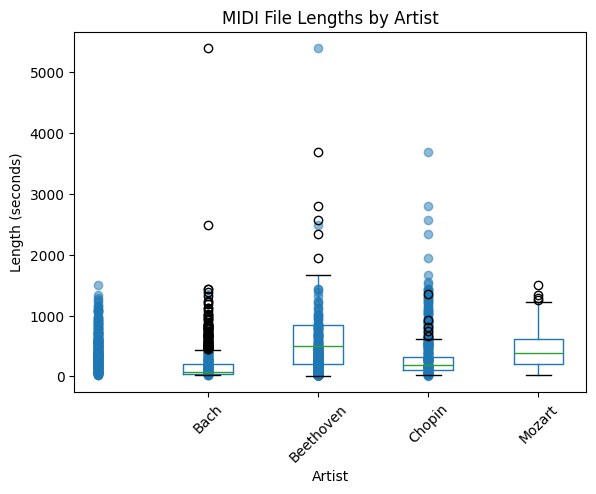

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import mido
from mido import MidiFile, bpm2tempo, tick2second

# Function to calculate the length of a MIDI file
def calculate_midi_length(file_path):
    try:
        midi_file = MidiFile(file_path)
        total_time = 0.0

        for track in midi_file.tracks:
            current_time = 0.0
            tempo = bpm2tempo(120)  # Default tempo is 120 BPM
            for msg in track:
                if msg.is_meta and msg.type == 'set_tempo':
                    tempo = msg.tempo
                current_time += tick2second(msg.time, midi_file.ticks_per_beat, tempo)
            if current_time > total_time:
                total_time = current_time

        return total_time
    except mido.KeySignatureError as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Define the base directory and artists
base_directory = raw_data_extracted
specific_artists = ['Bach', 'Beethoven', 'Chopin', 'Mozart']
midi_lengths = {}

# Recursively walk through the directories and calculate lengths
for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith('.mid'):
            file_path = os.path.join(root, file)
            relative_path = os.path.relpath(file_path, base_directory)
            for artist in specific_artists:
                if artist in relative_path:
                    midi_length = calculate_midi_length(file_path)
                    if midi_length is not None:
                        midi_lengths[relative_path] = midi_length
                    break

# Create a DataFrame for plotting
data = {'Artist': [], 'Length': []}
for path, length in midi_lengths.items():
    for artist in specific_artists:
        if artist in path:
            data['Artist'].append(artist)
            data['Length'].append(length)
            break

df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(10, 6))
df.boxplot(by='Artist', column=['Length'], grid=False)
plt.scatter(df['Artist'], df['Length'], alpha=0.5)
plt.title('MIDI File Lengths by Artist')
plt.suptitle('')
plt.xlabel('Artist')
plt.ylabel('Length (seconds)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import mido
from mido import MidiFile, bpm2tempo, tick2second

# Function to calculate the length of a MIDI file
def calculate_midi_length(file_path):
    try:
        midi_file = MidiFile(file_path)
        total_time = 0.0

        for track in midi_file.tracks:
            current_time = 0.0
            tempo = bpm2tempo(120)  # Default tempo is 120 BPM
            for msg in track:
                if msg.is_meta and msg.type == 'set_tempo':
                    tempo = msg.tempo
                current_time += tick2second(msg.time, midi_file.ticks_per_beat, tempo)
            if current_time > total_time:
                total_time = current_time

        return total_time
    except mido.KeySignatureError as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Function to walk through directories and calculate MIDI lengths for a specific artist
def get_midi_lengths_for_artist(artist_directory):
    midi_lengths = {}
    file_count = 0
    
    for root, dirs, files in os.walk(artist_directory):
        for file in files:
            if file.endswith('.mid'):
                file_path = os.path.join(root, file)
                relative_path = os.path.relpath(file_path, base_directory)
                midi_length = calculate_midi_length(file_path)
                if midi_length is not None:
                    midi_lengths[relative_path] = midi_length
                    file_count += 1
    
    return midi_lengths, file_count

base_directory = raw_data_extracted
specific_artists = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

# Dictionary to hold all results
all_midi_lengths = {}
artist_file_counts = {}

# Get the MIDI lengths and file counts for each artist
for artist in specific_artists:
    artist_directory = os.path.join(base_directory, artist)
    midi_lengths, file_count = get_midi_lengths_for_artist(artist_directory)
    all_midi_lengths.update(midi_lengths)
    artist_file_counts[artist] = file_count



Error processing raw_data_unzipped/Beethoven/Anhang 14-3.mid: Could not decode key with 3 flats and mode 255
Error processing raw_data_unzipped/Mozart/Piano Sonatas/Nueva carpeta/K281 Piano Sonata n03 3mov.mid: Could not decode key with 2 flats and mode 2


In [ ]:
# Print the count of MIDI files for each artist
for artist, count in artist_file_counts.items():
    print(f"{artist}: {count} MIDI files")

Bach: 1024 MIDI files
Beethoven: 212 MIDI files
Chopin: 136 MIDI files
Mozart: 256 MIDI files


<Figure size 1200x800 with 0 Axes>

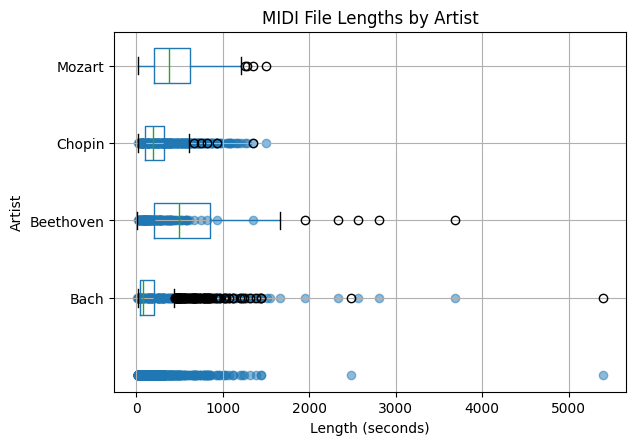

In [ ]:
# Create the initial DataFrame directly from the dictionary
midi_file_lengths_df = pd.DataFrame(list(all_midi_lengths.items()), columns=['Path', 'Length'])
midi_file_lengths_df['Artist'] = midi_file_lengths_df['Path'].apply(lambda x: next((artist for artist in specific_artists if artist in x), 'Unknown'))


# Create horizontal box plots
plt.figure(figsize=(12, 8))
midi_file_lengths_df.boxplot(by='Artist', column=['Length'], vert=False)
plt.scatter(midi_file_lengths_df['Length'], midi_file_lengths_df['Artist'], alpha=0.5)
plt.title('MIDI File Lengths by Artist')
plt.suptitle('')
plt.xlabel('Length (seconds)')
plt.ylabel('Artist')
plt.yticks(rotation=0)
plt.show()

Testing with file format

In [4]:
from mido import MidiFile

midi_file = MidiFile('/Users/zaina/Desktop/Masters-class/AAI-511-Final-Project/raw_data_unzipped/Diabelli Sonatina op151 n1 2mov.mid', clip=True)


In [6]:
# Number of tracks
num_tracks = len(midi_file.tracks)
print(f'Number of tracks: {num_tracks}')

# Number of messages per track
for i, track in enumerate(midi_file.tracks):
    num_messages = len(track)
    print(f'Number of messages in Track {i}: {num_messages}')

# Specific message types and counts
message_types = {}
for track in midi_file.tracks:
    for msg in track:
        if msg.type not in message_types:
            message_types[msg.type] = 0
        message_types[msg.type] += 1

print('Message types and counts:')
for msg_type, count in message_types.items():
    print(f'{msg_type}: {count}')


Number of tracks: 8
Number of messages in Track 0: 114
Number of messages in Track 1: 2
Number of messages in Track 2: 2
Number of messages in Track 3: 6
Number of messages in Track 4: 6
Number of messages in Track 5: 6
Number of messages in Track 6: 381
Number of messages in Track 7: 996
Message types and counts:
time_signature: 1
sequencer_specific: 2
set_tempo: 110
end_of_track: 8
track_name: 7
control_change: 15
program_change: 6
note_on: 682
note_off: 682


In [7]:
 # Extract note on/off events and their counts
note_on_counts = {}
note_off_counts = {}

for track in midi_file.tracks:
    for msg in track:
        if msg.type == 'note_on':
            if msg.note not in note_on_counts:
                note_on_counts[msg.note] = 0
            note_on_counts[msg.note] += 1
        elif msg.type == 'note_off':
            if msg.note not in note_off_counts:
                note_off_counts[msg.note] = 0
            note_off_counts[msg.note] += 1

print('Note On events:')
for note, count in note_on_counts.items():
    print(f'Note {note}: {count}')

print('Note Off events:')
for note, count in note_off_counts.items():
    print(f'Note {note}: {count}')


Note On events:
Note 72: 25
Note 76: 22
Note 48: 12
Note 74: 30
Note 71: 12
Note 77: 14
Note 43: 13
Note 73: 6
Note 79: 20
Note 67: 93
Note 69: 4
Note 64: 57
Note 60: 73
Note 75: 6
Note 78: 8
Note 81: 4
Note 84: 1
Note 59: 46
Note 65: 58
Note 53: 16
Note 57: 16
Note 62: 56
Note 55: 64
Note 52: 8
Note 63: 16
Note 36: 1
Note 40: 1
Note Off events:
Note 72: 25
Note 76: 22
Note 48: 12
Note 74: 30
Note 71: 12
Note 77: 14
Note 43: 13
Note 73: 6
Note 79: 20
Note 67: 93
Note 69: 4
Note 64: 57
Note 60: 73
Note 75: 6
Note 78: 8
Note 81: 4
Note 84: 1
Note 59: 46
Note 65: 58
Note 53: 16
Note 57: 16
Note 62: 56
Note 55: 64
Note 52: 8
Note 63: 16
Note 36: 1
Note 40: 1


In [23]:
test_file = '/Users/zaina/Desktop/Masters-class/AAI-511-Final-Project/raw_data_unzipped/Tchaikovsky Lake Of The Swans Act 1 1mov.mid'

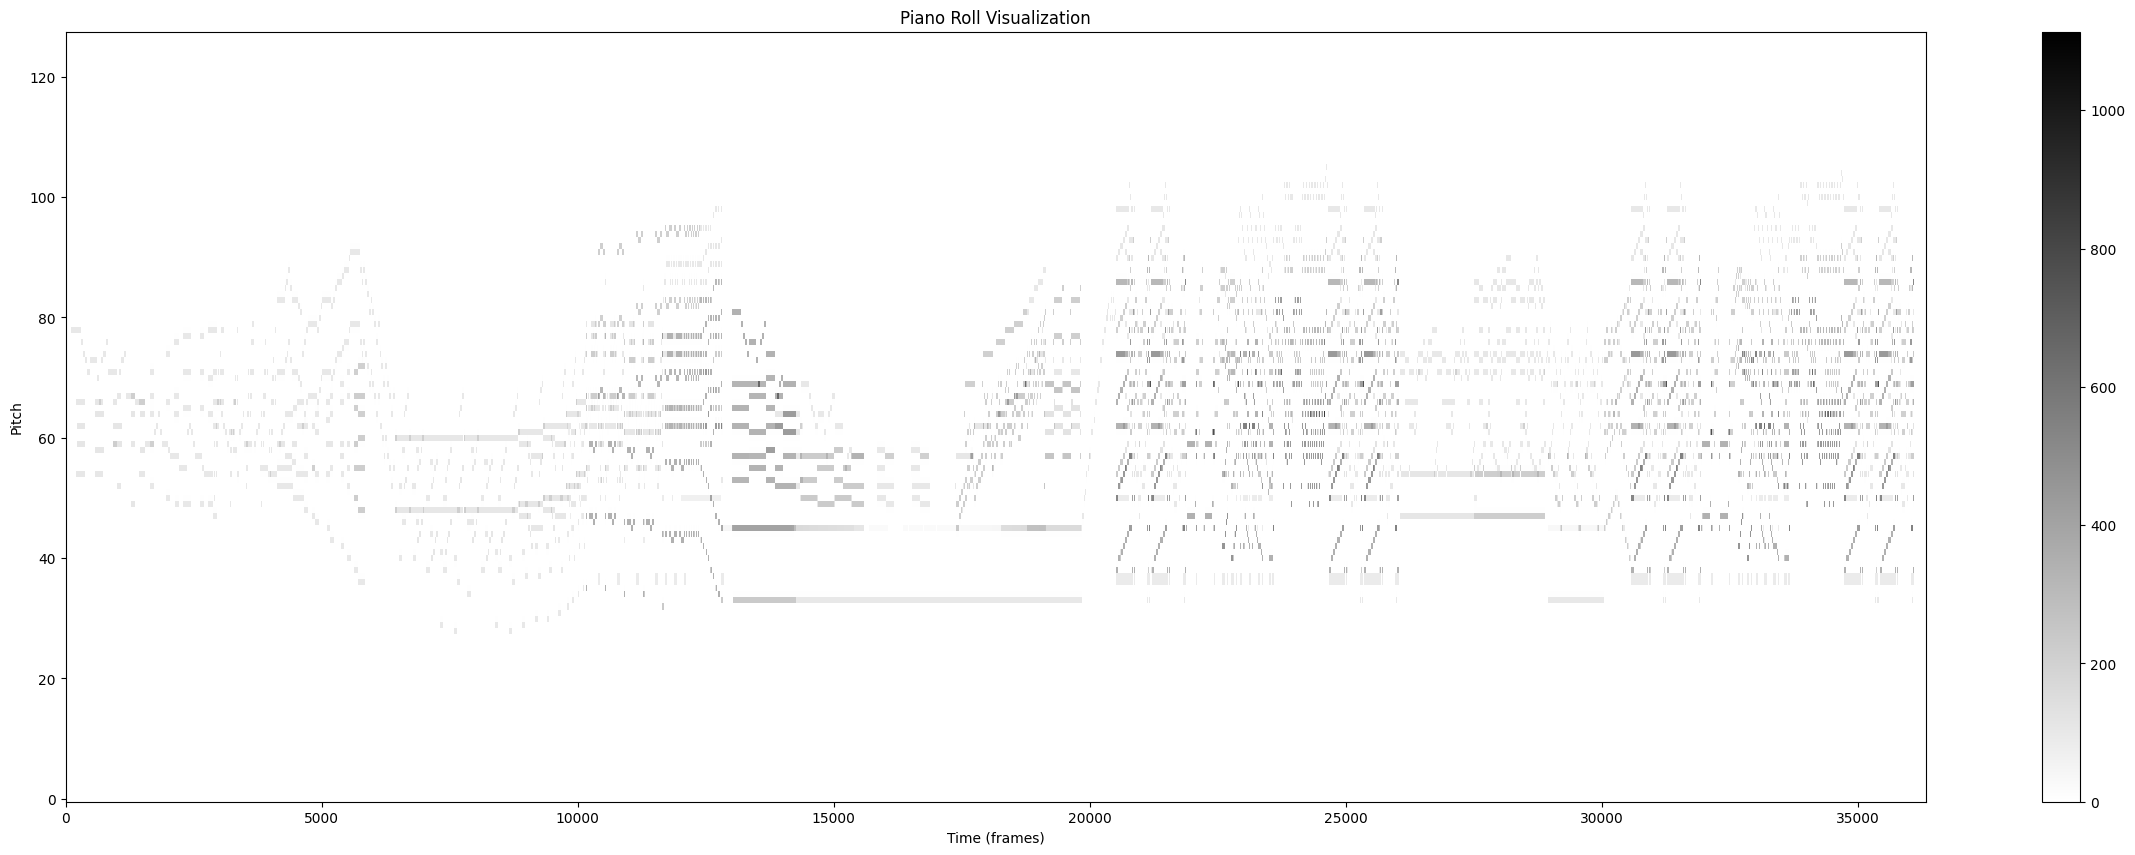

In [12]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt

# Load MIDI file
midi_data = pretty_midi.PrettyMIDI('/Users/zaina/Desktop/Masters-class/AAI-511-Final-Project/raw_data_unzipped/Tchaikovsky Lake Of The Swans Act 1 1mov.mid')

# Generate piano roll
piano_roll = midi_data.get_piano_roll(fs=100)

# Plot piano roll
plt.figure(figsize=(30, 10))
plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='gray_r', interpolation='nearest')
plt.xlabel('Time (frames)')
plt.ylabel('Pitch')
plt.title('Piano Roll Visualization')
plt.colorbar()
plt.show()


In [64]:
import pretty_midi
import numpy as np

import pretty_midi
import numpy as np

def process_multichannel_midi(file_path, fs=10, max_length=100):
    # Load the MIDI file
    midi_data = pretty_midi.PrettyMIDI(file_path)
    
    # Binary channel
    piano_roll = midi_data.get_piano_roll(fs=fs)
    binary_piano_roll = (piano_roll > 0).astype(int)
    
    # Velocity channel (using the same piano_roll, normalized)
    velocity_roll = piano_roll / 127  # Normalize velocity

    # Instrumentation channel (collect rolls and find maximum length)
    instrument_rolls = []
    for instrument in midi_data.instruments:
        inst_roll = instrument.get_piano_roll(fs=fs)
        instrument_rolls.append(inst_roll)
    
    max_instrument_length = max(inst.shape[1] for inst in instrument_rolls)
    
    # Create a combined instrument roll with maximum length
    combined_instrument_roll = np.zeros((128, max_instrument_length))
    for inst_roll in instrument_rolls:
        if inst_roll.shape[1] < max_instrument_length:
            # Pad to the right if shorter
            padding = np.zeros((128, max_instrument_length - inst_roll.shape[1]))
            inst_roll = np.hstack((inst_roll, padding))
        combined_instrument_roll += (inst_roll > 0).astype(int)
    
    # Expressive timing channel (calculate note durations)
    expressive_timing_roll = np.zeros((128, max_instrument_length))
    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = int(note.start * fs)
            end = int(note.end * fs)
            expressive_timing_roll[note.pitch, start:end] = 1  # Mark the duration as 1 (simplistic approach)

    # Ensure all rolls match the desired max_length
    if max_instrument_length > max_length:
        combined_instrument_roll = combined_instrument_roll[:, :max_length]
        expressive_timing_roll = expressive_timing_roll[:, :max_length]
    elif max_instrument_length < max_length:
        padding = np.zeros((128, max_length - max_instrument_length))
        combined_instrument_roll = np.hstack((combined_instrument_roll, padding))
        expressive_timing_roll = np.hstack((expressive_timing_roll, padding))
    
    # Normalize binary and velocity rolls to max_length
    binary_piano_roll = binary_piano_roll[:, :max_length]
    velocity_roll = velocity_roll[:, :max_length]

    # Stack channels
    multichannel_roll = np.stack([binary_piano_roll, velocity_roll, combined_instrument_roll, expressive_timing_roll], axis=-1)
    
    return multichannel_roll

import matplotlib.pyplot as plt

def plot_multichannel_piano_roll(processed_data):
    # Unpack the channels
    binary_channel = processed_data[:, :, 0]
    velocity_channel = processed_data[:, :, 1]
    instrument_channel = processed_data[:, :, 2]
    expressive_timing_channel = processed_data[:, :, 3]  # Placeholder channel
    
    # Set up the plot
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))
    titles = ['Binary Channel', 'Velocity Channel', 'Instrumentation Channel', 'Expressive Timing Channel']

    # Plot each channel
    for ax, channel, title in zip(axes, [binary_channel, velocity_channel, instrument_channel, expressive_timing_channel], titles):
        cax = ax.imshow(channel, aspect='auto', origin='lower', interpolation='nearest')
        ax.set_title(title)
        ax.set_xlabel('Time')
        ax.set_ylabel('Pitch')
        fig.colorbar(cax, ax=ax, orientation='vertical')
    
    plt.tight_layout()
    plt.show()



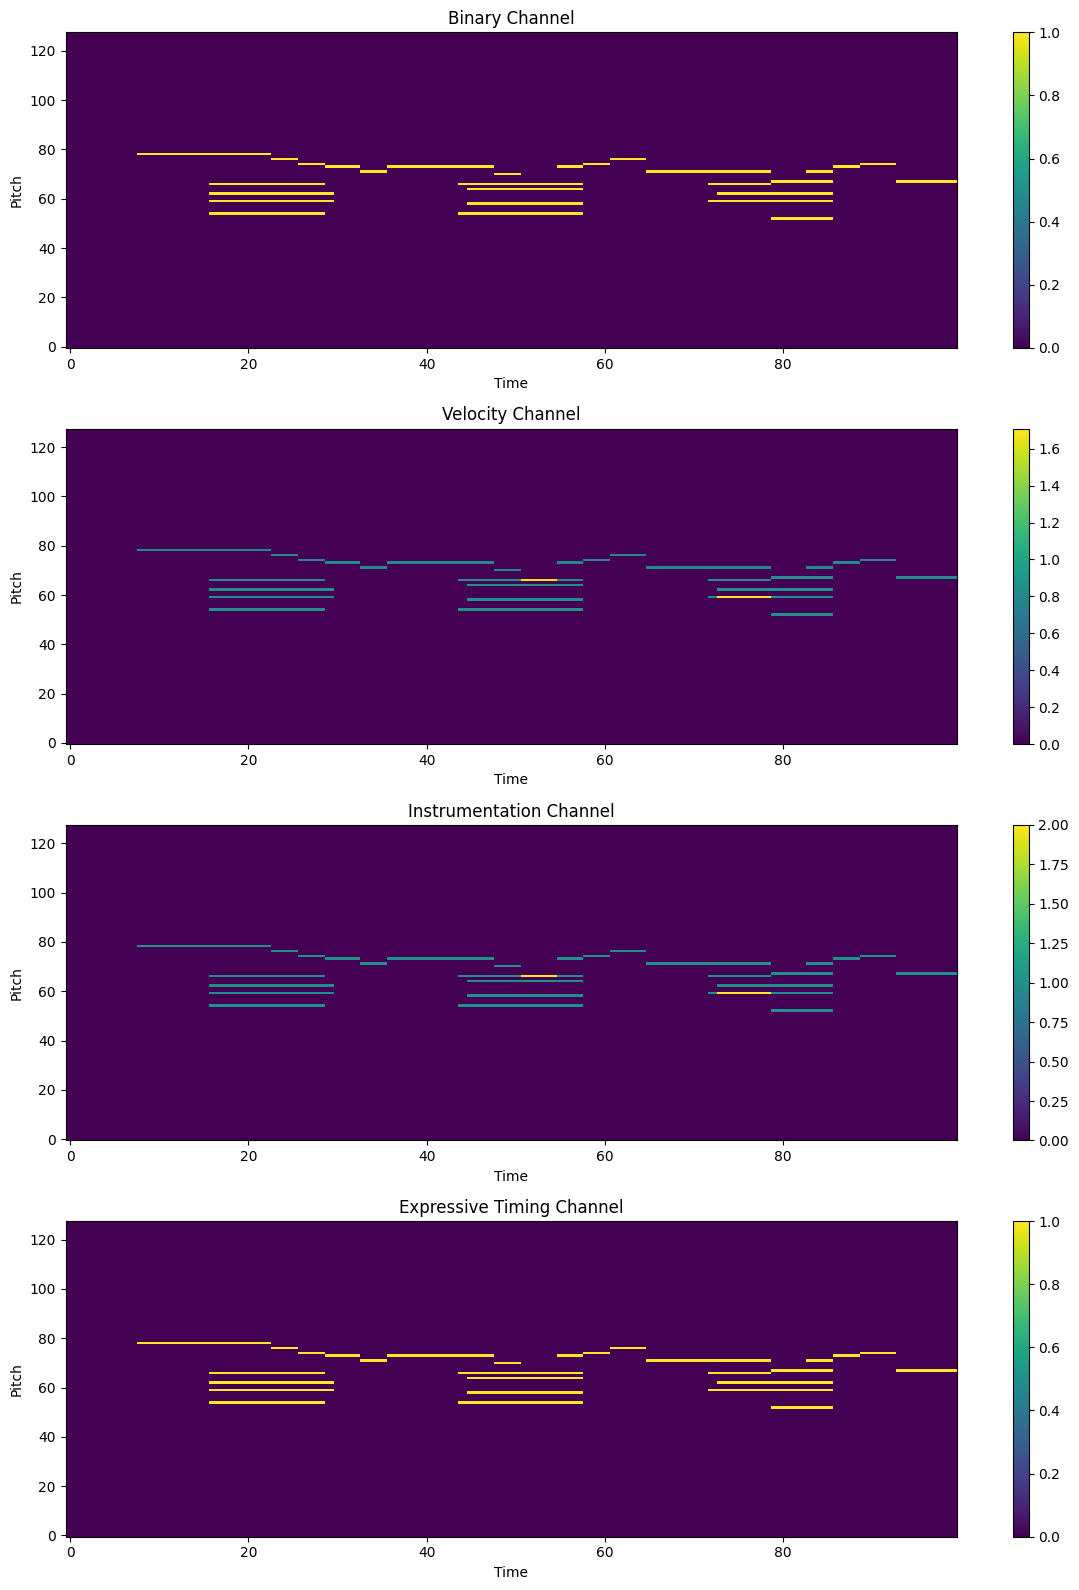

In [69]:
# Example use
file_path = test_file
processed_data = process_multichannel_midi(file_path, fs=8)

# Call the function with the processed data
plot_multichannel_piano_roll(processed_data)

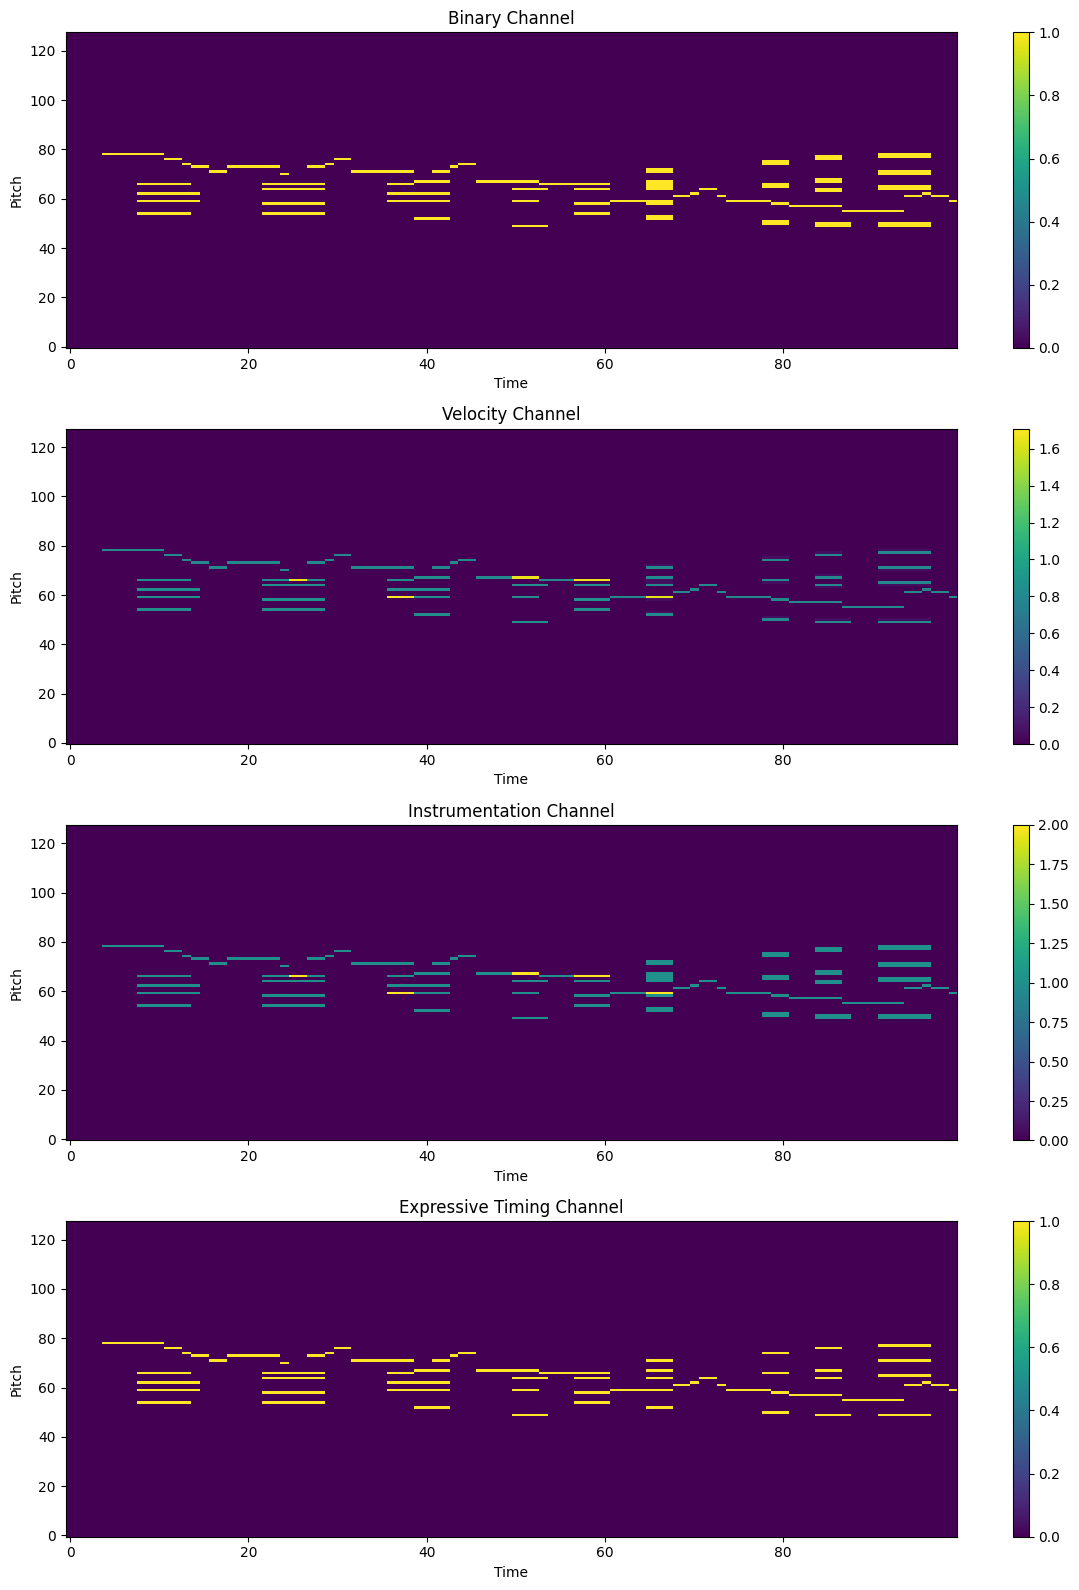

In [68]:
# Example use
file_path = test_file
processed_data = process_multichannel_midi(file_path, fs=4)

# Call the function with the processed data
plot_multichannel_piano_roll(processed_data)

In [73]:
import pretty_midi
import numpy as np

def midi_to_chunks(file_path, chunk_size=150, fs=10):
    # Load the MIDI file
    midi_data = pretty_midi.PrettyMIDI(file_path)
    
    # Get a piano roll array where the rows correspond to pitches and columns to time
    piano_roll = midi_data.get_piano_roll(fs=fs)
    
    # Number of chunks
    num_chunks = piano_roll.shape[1] // chunk_size
    
    # Prepare container for chunked data
    chunks = []
    
    # Create chunks
    for i in range(num_chunks):
        start = i * chunk_size
        end = start + chunk_size
        chunk = piano_roll[:, start:end]
        
        # Here you would apply your multichannel conversion
        binary = (chunk > 0).astype(int)
        velocity = chunk / 127
        # Add other channels as necessary
        
        # Stack channels along the third dimension
        multichannel_chunk = np.stack([binary, velocity], axis=-1)  # Add other channels similarly
        chunks.append(multichannel_chunk)
    
    # Handle last chunk if there is a remainder
    if piano_roll.shape[1] % chunk_size != 0:
        last_chunk = piano_roll[:, num_chunks * chunk_size:]
        # Padding the last chunk if necessary
        if last_chunk.shape[1] < chunk_size:
            padding = np.zeros((128, chunk_size - last_chunk.shape[1], 2))  # Adjust depth for number of channels
            last_chunk_padded = np.stack([(last_chunk > 0).astype(int), last_chunk / 127], axis=-1)  # Adjust for channels
            last_chunk_padded = np.concatenate([last_chunk_padded, padding], axis=1)
            chunks.append(last_chunk_padded)

    return chunks

file_path = test_file
chunks = midi_to_chunks(file_path)

In [75]:
import matplotlib.pyplot as plt

def visualize_chunks(chunks):
    num_chunks = len(chunks)
    fig, axes = plt.subplots(num_chunks, 2, figsize=(15, 3 * num_chunks))  # 2 columns for binary and velocity
    
    if num_chunks == 1:  # Ensure axes array does not collapse
        axes = [axes]

    for i, chunk in enumerate(chunks):
        # Binary Channel
        ax1 = axes[i][0] if num_chunks > 1 else axes[0]
        binary_channel = chunk[:, :, 0]  # Assuming binary channel is the first channel
        cax1 = ax1.imshow(binary_channel, aspect='auto', origin='lower', cmap='gray', interpolation='none')
        ax1.set_title(f'Chunk {i+1} - Binary Channel')
        ax1.set_xlabel('Time (frames)')
        ax1.set_ylabel('Pitch')
        fig.colorbar(cax1, ax=ax1, orientation='vertical')
        
        # Velocity Channel
        ax2 = axes[i][1] if num_chunks > 1 else axes[1]
        velocity_channel = chunk[:, :, 1]  # Assuming velocity channel is the second channel
        cax2 = ax2.imshow(velocity_channel, aspect='auto', origin='lower', cmap='viridis', interpolation='none')
        ax2.set_title(f'Chunk {i+1} - Velocity Channel')
        ax2.set_xlabel('Time (frames)')
        ax2.set_ylabel('Pitch')
        fig.colorbar(cax2, ax=ax2, orientation='vertical')

    plt.tight_layout()
    plt.show()

# Example usage
# Assuming `chunks` is a list of numpy arrays from the previous function 'midi_to_chunks'
# visualize_chunks(chunks)


Using df

In [76]:
import pretty_midi
import numpy as np

def midi_to_chunks(file_path, artist, fs=10, chunk_size=150):
    # Load the MIDI file
    midi_data = pretty_midi.PrettyMIDI(file_path)
    
    # Get a piano roll array
    piano_roll = midi_data.get_piano_roll(fs=fs)
    
    # Number of chunks and the last chunk size
    num_full_chunks = piano_roll.shape[1] // chunk_size
    last_chunk_size = piano_roll.shape[1] % chunk_size
    chunks = []
    
    # Process each full chunk
    for i in range(num_full_chunks):
        start = i * chunk_size
        end = start + chunk_size
        chunk_data = piano_roll[:, start:end]
        chunks.append((chunk_data, artist, file_path, i+1, 'No'))  # No padding added
    
    # Handle the last chunk if it's not a full chunk
    if last_chunk_size > 0:
        padding = np.zeros((128, chunk_size - last_chunk_size))
        last_chunk = np.hstack((piano_roll[:, -last_chunk_size:], padding))
        chunks.append((last_chunk, artist, file_path, num_full_chunks + 1, 'Yes'))  # Padding added
    
    return chunks


In [127]:
## Testing different chunk configurations


def midi_to_chunks(file_path, artist, fs=10, chunk_size=150, overlap=0.5):
    # Load the MIDI file
    midi_data = pretty_midi.PrettyMIDI(file_path)
    
    # Get a piano roll array
    piano_roll = midi_data.get_piano_roll(fs=fs)
    
    # Calculate step size based on overlap
    step_size = int(chunk_size * (1 - overlap))
    
    # Initialize the chunks list
    chunks = []
    
    # Process each chunk with the specified overlap
    for start in range(0, piano_roll.shape[1], step_size):
        end = start + chunk_size
        if end <= piano_roll.shape[1]:
            chunk_data = piano_roll[:, start:end]
            chunks.append((chunk_data, artist, file_path, len(chunks) + 1, 'No'))
        else:
            # Handle the last chunk if it doesn't fit perfectly
            last_chunk_size = piano_roll.shape[1] - start
            padding = np.zeros((128, chunk_size - last_chunk_size))
            last_chunk = np.hstack((piano_roll[:, start:], padding))
            chunks.append((last_chunk, artist, file_path, len(chunks) + 1, 'Yes'))
            break
    
    return chunks


def midi_to_multi_scale_chunks(file_path, artist, fs=10, chunk_size = 150):

    small_chunk_size = int(chunk_size*0.75)
    large_chunk_size = chunk_size*2
    # Load the MIDI file
    midi_data = pretty_midi.PrettyMIDI(file_path)
    
    # Get a piano roll array
    piano_roll = midi_data.get_piano_roll(fs=fs)
    
    chunks = []
    
    # Process small chunks
    num_small_chunks = piano_roll.shape[1] // small_chunk_size
    for i in range(num_small_chunks):
        start = i * small_chunk_size
        end = start + small_chunk_size
        chunk_data = piano_roll[:, start:end]
        chunks.append((chunk_data, artist, file_path, f'small-{i+1}', 'No'))
    
    # Handle the last small chunk if it's not a full chunk
    last_small_chunk_size = piano_roll.shape[1] % small_chunk_size
    if last_small_chunk_size > 0:
        padding = np.zeros((128, small_chunk_size - last_small_chunk_size))
        last_small_chunk = np.hstack((piano_roll[:, -last_small_chunk_size:], padding))
        chunks.append((last_small_chunk, artist, file_path, f'small-{num_small_chunks + 1}', 'Yes'))
    
    # Process large chunks
    num_large_chunks = piano_roll.shape[1] // large_chunk_size
    for i in range(num_large_chunks):
        start = i * large_chunk_size
        end = start + large_chunk_size
        chunk_data = piano_roll[:, start:end]
        chunks.append((chunk_data, artist, file_path, f'large-{i+1}', 'No'))
    
    # Handle the last large chunk if it's not a full chunk
    last_large_chunk_size = piano_roll.shape[1] % large_chunk_size
    if last_large_chunk_size > 0:
        padding = np.zeros((128, large_chunk_size - last_large_chunk_size))
        last_large_chunk = np.hstack((piano_roll[:, -last_large_chunk_size:], padding))
        chunks.append((last_large_chunk, artist, file_path, f'large-{num_large_chunks + 1}', 'Yes'))
    
    return chunks


In [155]:
def process_all_files(df, base_url, fs=10, chunk_size=150):
    all_chunks = []
    for idx, row in df.iterrows():
        file_path = f"{base_url}/{row['Path']}"
        artist = row['Artist']
        chunks = midi_to_chunks(file_path, artist, fs, chunk_size)
        all_chunks.extend(chunks)
    
    # Create a new DataFrame
    columns = ['Chunk', 'Artist', 'Original Path', 'Chunk Number', 'Padding Added']
    chunk_df = pd.DataFrame(all_chunks, columns=columns)
    
    return chunk_df


In [156]:
import pandas as pd
midi_file_df  = pd.read_csv('midi_files_df.csv')

In [157]:
processed_chunk_df = process_all_files(midi_file_df, raw_data_extracted, fs=8, chunk_size=150)

/Users/zaina/Desktop/Masters-class/dataprepenv/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [166]:
print('How many chunks has padding')
print(processed_chunk_df["Padding Added"].value_counts())
print(processed_chunk_df["Padding Added"].value_counts(normalize=True) * 100)

# might want to check if removing the padded data has any effect.

How many chunks has padding
No     39585
Yes     1628
Name: Padding Added, dtype: int64
No     96.04979
Yes     3.95021
Name: Padding Added, dtype: float64


In [170]:
processed_chunk_df['Chunk'].iloc[0].shape

(128, 150)

In [171]:
def preprocess_chunks(dataframe, chunk_size=150):
    # Initialize an empty list to hold processed chunks
    processed_chunks = []
    
    # Iterate through each chunk in the DataFrame
    for chunk in dataframe['Chunk']:
        # Ensure the chunk is a numpy array and reshape if necessary
        if isinstance(chunk, np.ndarray):
            if chunk.shape[1] != chunk_size:
                # Check if padding is needed
                if chunk.shape[1] < chunk_size:
                    padding = np.zeros((128, chunk_size - chunk.shape[1]))
                    chunk = np.hstack((chunk, padding))
                else:
                    # Or truncation if the chunk is longer
                    chunk = chunk[:, :chunk_size]
            processed_chunks.append(chunk)
        else:
            # Log or handle cases where the chunk is not a numpy array
            print("Chunk is not a numpy array. Check data preparation steps.")
    
    # Convert list of arrays into a single 4D numpy array for CNN input
    X = np.stack(processed_chunks) / 127.0  # Normalize the MIDI velocities
    X = X.reshape(-1, 128, chunk_size, 1)  # Reshape for CNN
    return X

X = preprocess_chunks(processed_chunk_df, )


In [172]:
X.shape

(41213, 128, 150, 1)

In [173]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def encode_labels(labels):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    
    # OneHotEncoder setup
    onehot_encoder = OneHotEncoder(sparse_output=False)  # Ensure the output is dense
    integer_encoded = integer_encoded.reshape(-1, 1)  # Reshape for OneHotEncoder
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)  # No need for .toarray()
    
    return onehot_encoded, label_encoder

y, label_encoder = encode_labels(processed_chunk_df['Artist'])

In [162]:
y.shape

(41213, 4)

In [174]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(len(np.unique(processed_chunk_df['Artist'])), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/Users/zaina/Desktop/Masters-class/dataprepenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 126, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 63, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 63, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 61, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 30, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 30, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 69120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     8,847,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,866,820 (33.82 MB)

 Trainable params: 8,866,820 (33.82 MB)

 Non-trainable params: 0 (0.00 B)

In [177]:
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val))

Epoch 1/2
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 101s 98ms/step - accuracy: 0.5902 - loss: 0.9702 - val_accuracy: 0.7101 - val_loss: 0.7100
Epoch 2/2
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 101s 98ms/step - accuracy: 0.7229 - loss: 0.6667 - val_accuracy: 0.7579 - val_loss: 0.5866


In [178]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy:.2f}, Validation loss: {val_loss:.2f}')

258/258 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7643 - loss: 0.5731
Validation accuracy: 0.76, Validation loss: 0.59


In [118]:
predictions = model.predict(X_val)
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
